Exploratory data Analysis on Global Terrorism


In [ ]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")


Reading the Data

In [ ]:
Terror =pd.read_csv('/content/Global Terrorism - START data.zip', encoding='latin-1')
Terror


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

Columns names

In [ ]:
Terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Displaying the info of the terror dataset



Checking for the null values

In [ ]:
Terror.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Renaming the important columns

In [ ]:
Terror.rename(columns={'provstate':'State','iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Adding a new column

In [ ]:
Terror['Casualities'] = Terror.Killed + Terror.Wounded

Making a new dataset of important columns

In [ ]:
Terror_updated = Terror[['Year','Month','Day','Country','State','Region','City','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive',"Casualities"]]


Display first 5 rows

In [ ]:
Terror_updated.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


Checking null values for the new dataset

In [ ]:
Terror_updated.isna().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
Attack_type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

No. of rows and columns

In [ ]:
Terror_updated.shape

(181691, 19)

Final Terror Dataset

In [ ]:
Terror_Final = Terror_updated.dropna(axis=0)

No. of rows and columns of the Final terror dataset

In [ ]:
Terror_Final.shape

(46556, 19)

Checking for the duplicated value

In [ ]:
Terror_Final.duplicated()

5         False
8         False
9         False
11        False
14        False
          ...  
181663    False
181665    False
181672    False
181682    False
181683    False
Length: 46556, dtype: bool

The Most Attacked countries , city , region, year, month, group, types

In [ ]:
print("Country with the most attacks:",Terror_Final['Country'].value_counts().idxmax())
print("City with the most attacks:",Terror_Final['City'].value_counts().index[0]) #as first entry is 'unknown'
print("Region with the most attacks:",Terror_Final['Region'].value_counts().idxmax())
print("Year with the most attacks:",Terror_Final['Year'].value_counts().idxmax())
print("Month with the most attacks:",Terror_Final['Month'].value_counts().idxmax())
print("Group with the most attacks:",Terror_Final
['Attack_type'].value_counts().idxmax())


Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: South Asia
Year with the most attacks: 2011
Month with the most attacks: 7
Group with the most attacks: Bombing/Explosion


Country - Top 10 countries affected by terror attack

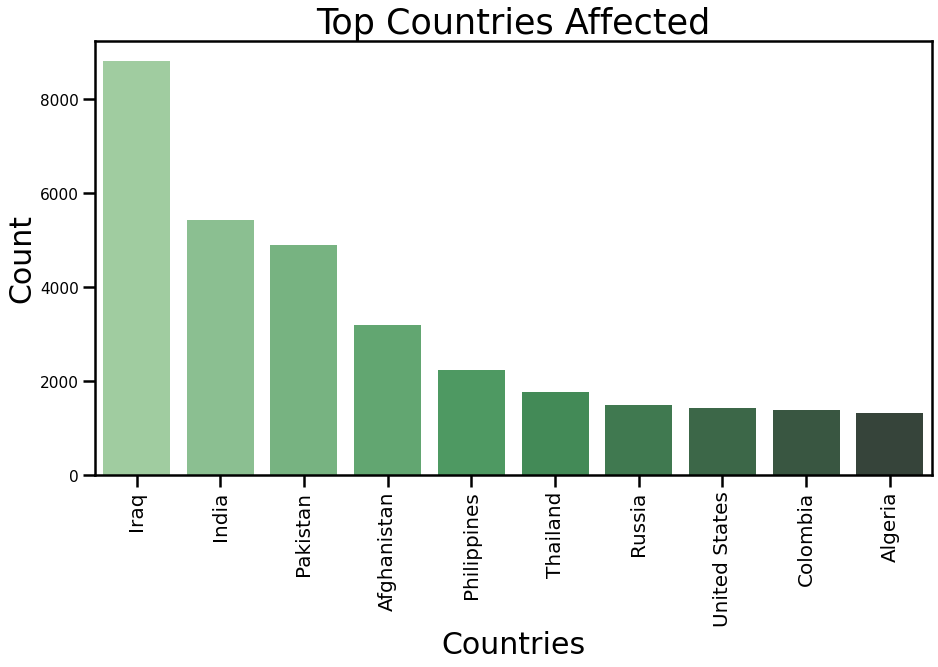

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

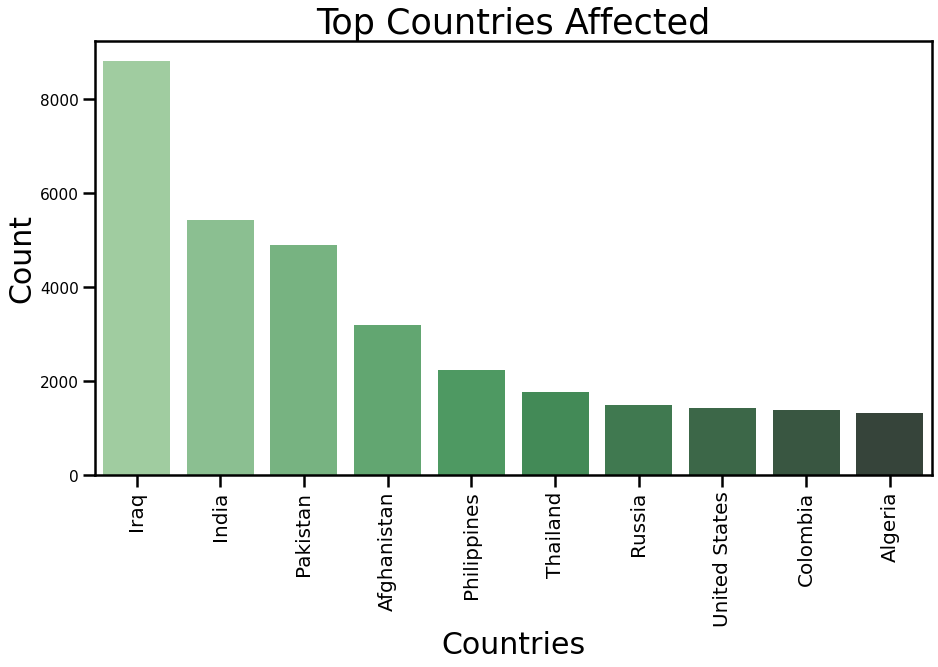

1 . Iraq ------>
                             8811 attacks

2 . India ------>
                             5427 attacks

3 . Pakistan ------>
                             4900 attacks

4 . Afghanistan ------>
                             3206 attacks

5 . Philippines ------>
                             2253 attacks

6 . Thailand ------>
                             1782 attacks

7 . Russia ------>
                             1488 attacks

8 . United States ------>
                             1426 attacks

9 . Colombia ------>
                             1389 attacks

10 . Algeria ------>
                             1328 attacks



In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()
idx=1
for i in Terror_Final['Country'].value_counts()[0:10].index:
    print(idx,".",i,"------>")
    print("                            ",Terror_Final['Country'].value_counts()[i],"attacks")
    print()
    idx+=1

Year - Number of Terrorist Activities each Year

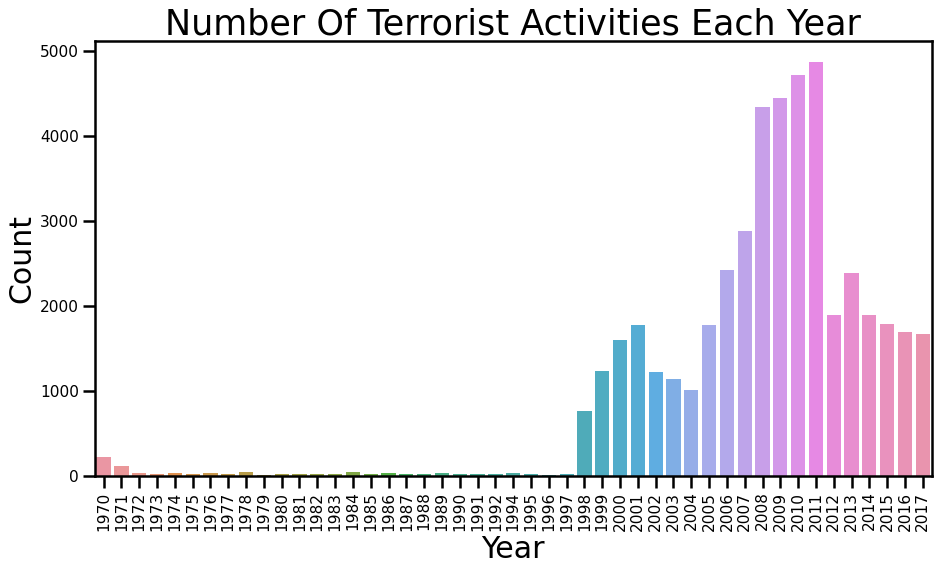

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context("poster" , font_scale = 0.7)
sns.countplot(Terror_Final["Year"])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year' ,fontsize = 35 )
plt.xlabel('Year' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.show()


Year - Top 10 Affected Years

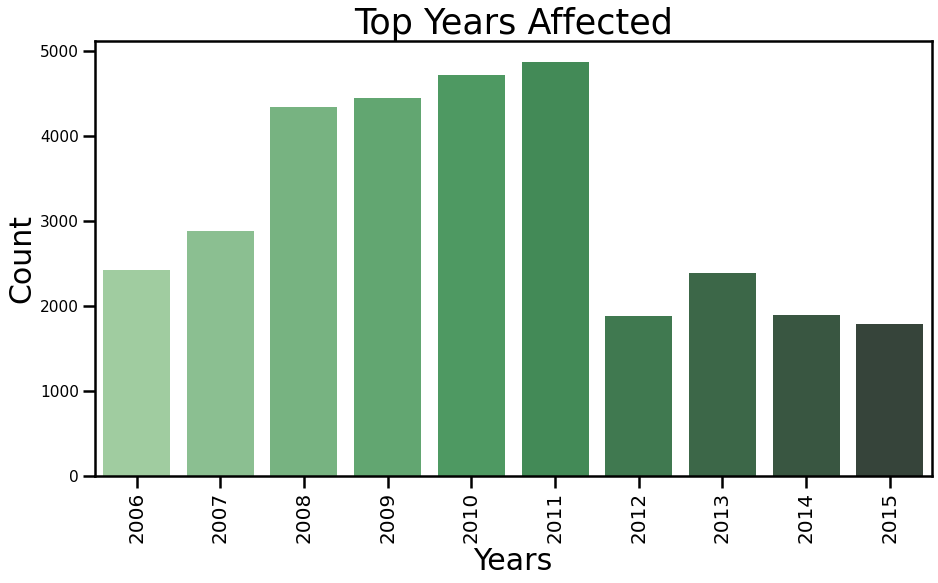

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Year'].value_counts()[:10].index,
            Terror_Final['Year'].value_counts()[:10].values,
            palette='Greens_d')
plt.title('Top Years Affected' , fontsize = 35)
plt.xlabel('Years' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

arget_type - Counts of attacks on different types of targets

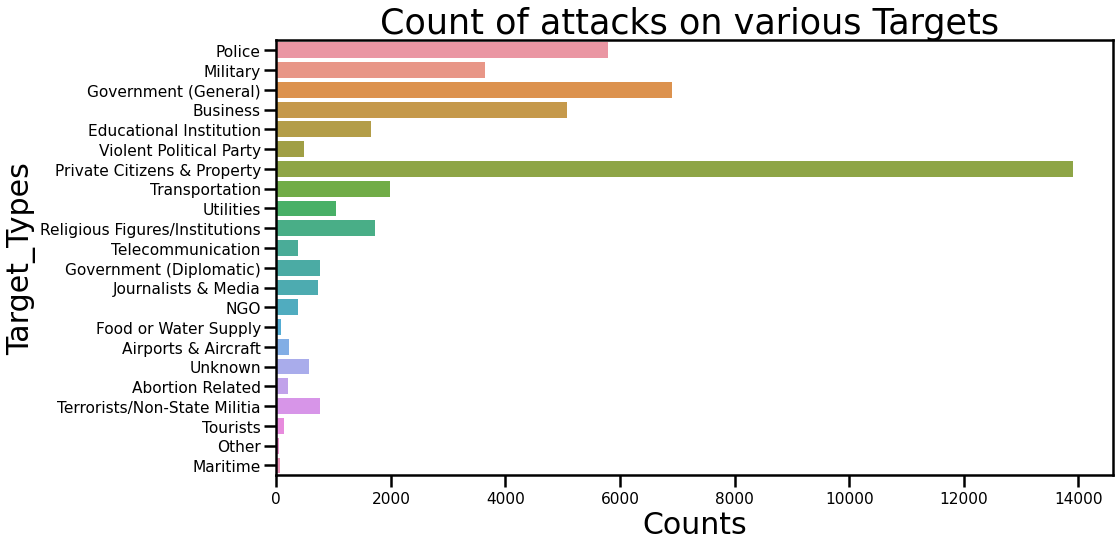

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Target_type'])
plt.title('Count of attacks on various Targets ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Target_Types' , fontsize = 30)
plt.show()

Weapon Type - counts of weapons used in attacks

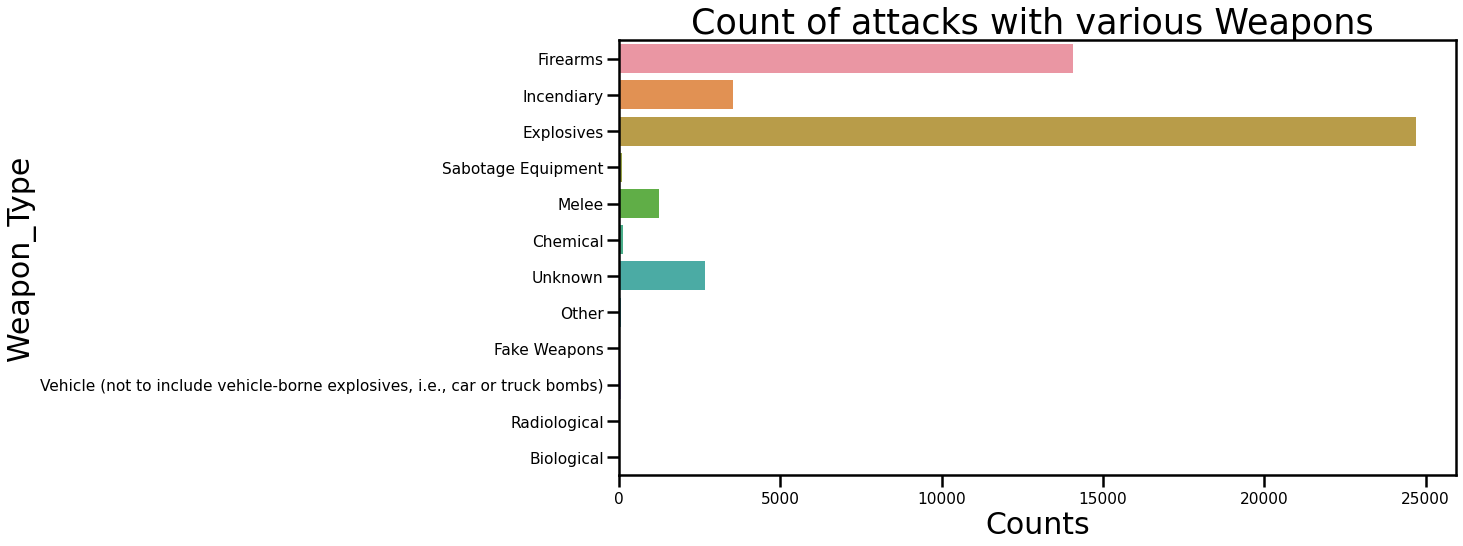

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Weapon_type'])
plt.title('Count of attacks with various Weapons ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Weapon_Type', fontsize = 30 )
plt.show()

Terrorist Organisations - Top 10

In [ ]:
Terror_Final['Group'].value_counts()[:10]

Unknown                                           23234
Taliban                                            1884
Communist Party of India - Maoist (CPI-Maoist)     1654
Revolutionary Armed Forces of Colombia (FARC)       845
New People's Army (NPA)                             806
Tehrik-i-Taliban Pakistan (TTP)                     797
Islamic State of Iraq and the Levant (ISIL)         784
Maoists                                             740
Al-Shabaab                                          642
Liberation Tigers of Tamil Eelam (LTTE)             613
Name: Group, dtype: int64

8.Most affected Regions Across the Globe

In [ ]:
Terror_Final["Region"].value_counts()

South Asia                     15885
Middle East & North Africa     14186
Southeast Asia                  4703
Sub-Saharan Africa              3554
Western Europe                  2442
Eastern Europe                  2095
South America                   1650
North America                   1543
Central Asia                     224
East Asia                        152
Central America & Caribbean       72
Australasia & Oceania             50
Name: Region, dtype: int64

Most Active Terrorist Organization

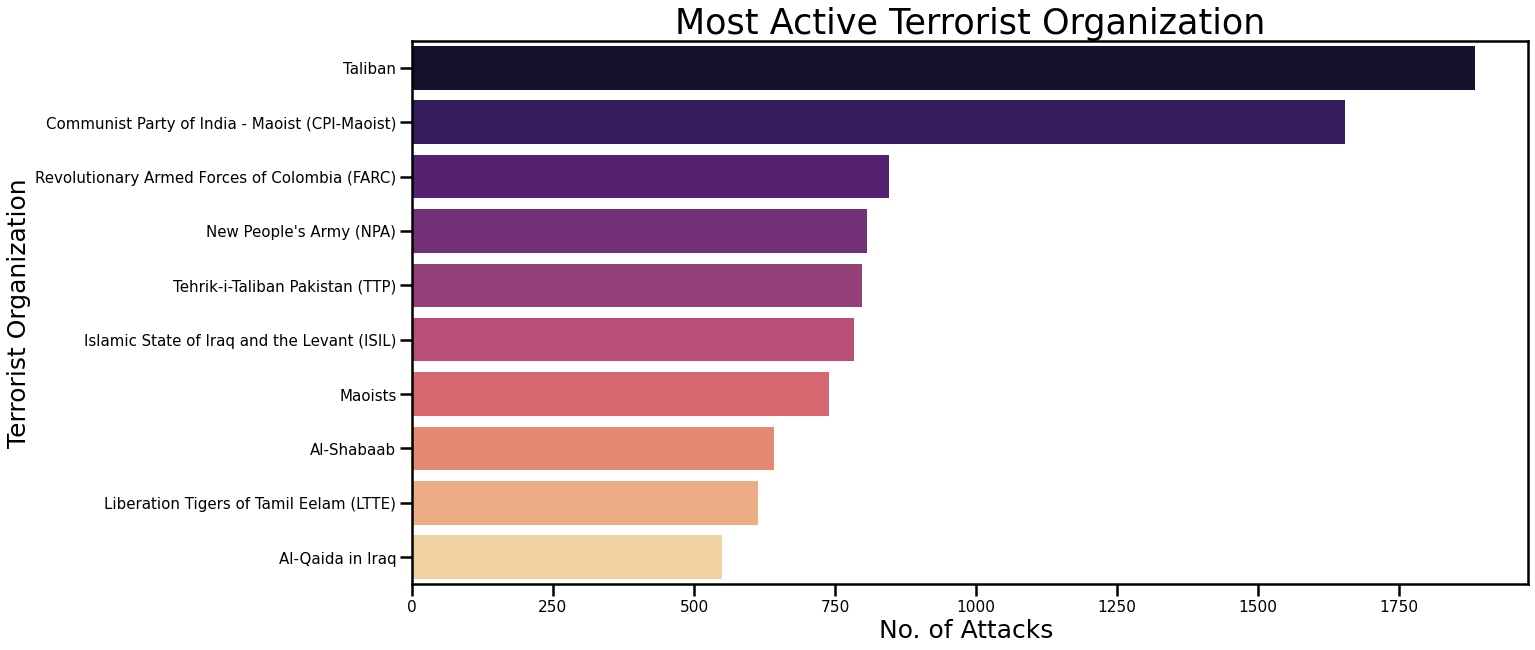

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x=Terror_Final['Group'].value_counts()[1:11].values,
            y=Terror_Final['Group'].value_counts()[1:11].index,
            palette='magma')
plt.yticks(size=15)
plt.xlabel("No. of Attacks ",fontsize=25)
plt.ylabel("Terrorist Organization",fontsize=25)
plt.title("Most Active Terrorist Organization",fontsize=35)
plt.show()
fig.savefig('Most Active Terrorist Oraganization',bbox_inches='tight')

In [ ]:
idx=1
print("                         Most Active Terror Organizations")
for i in Terror_Final['Group'].value_counts()[1:6].index:
    print(idx,".",i,"---->")                                                                  
    print("                                                     ",Terror_Final['Group'].value_counts()[i],"attacks")
    print()
    idx+=1

                         Most Active Terror Organizations
1 . Taliban ---->
                                                      1884 attacks

2 . Communist Party of India - Maoist (CPI-Maoist) ---->
                                                      1654 attacks

3 . Revolutionary Armed Forces of Colombia (FARC) ---->
                                                      845 attacks

4 . New People's Army (NPA) ---->
                                                      806 attacks

5 . Tehrik-i-Taliban Pakistan (TTP) ---->
                                                      797 attacks



Number of Casuality Due to Terror attacks

In [ ]:
lis=[]
total=[]
for i in Terror_Final['Country'].value_counts().index:
    Total = Terror_Final.loc[Terror_Final['Country'] == i, 'Casualities'].sum()
    lis.append([i,Total])

In [ ]:
lis=sorted(lis,key=lambda x:x[1],reverse=True)
print(*lis[:20])   #country wise casuality over the years from 1970 to 2017

['Iraq', 109153.0] ['Pakistan', 36224.0] ['India', 24169.0] ['Afghanistan', 22551.0] ['United States', 20834.0] ['Sri Lanka', 9798.0] ['Russia', 9309.0] ['Algeria', 8208.0] ['Philippines', 7626.0] ['Somalia', 7179.0] ['Kenya', 6146.0] ['Colombia', 5923.0] ['Nigeria', 5886.0] ['Thailand', 5653.0] ['Israel', 5287.0] ['Turkey', 4515.0] ['Yemen', 4334.0] ['Syria', 3160.0] ['Nepal', 3159.0] ['Bangladesh', 2784.0]


Country vs Casuality

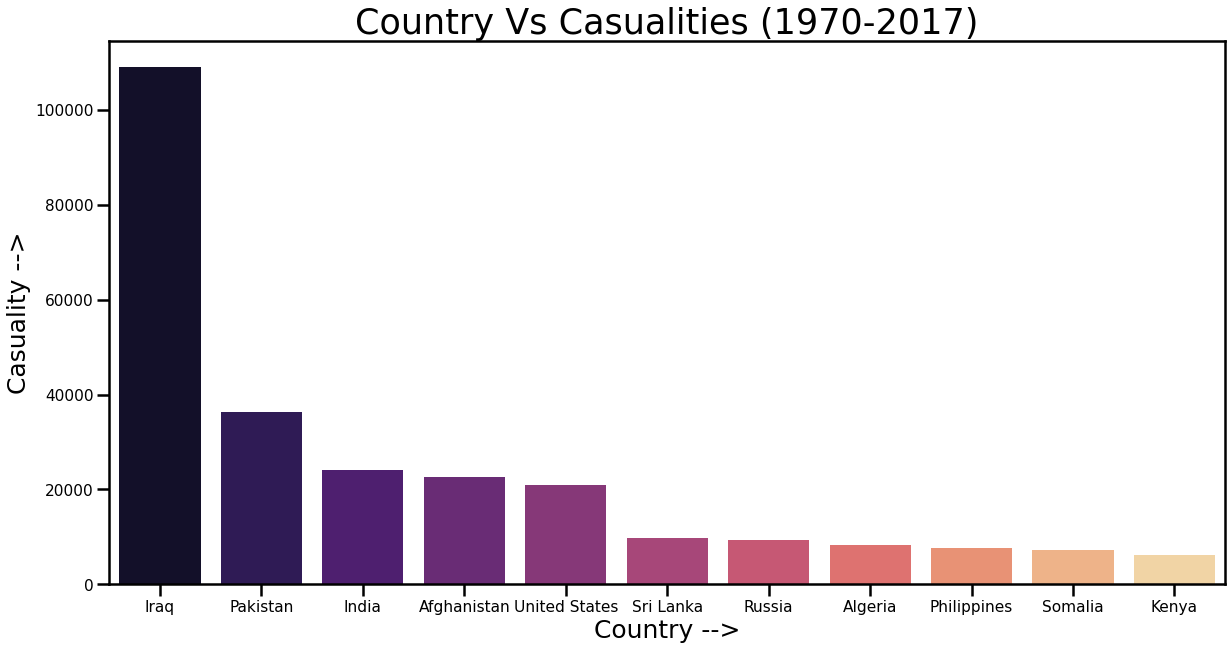

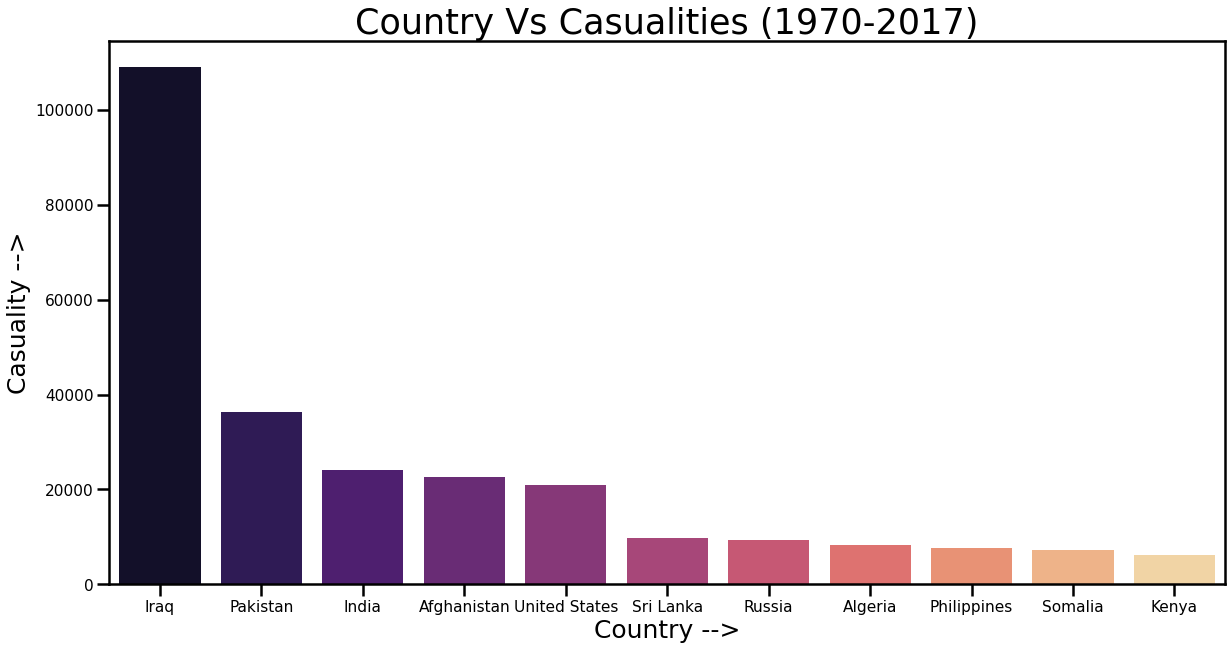

In [ ]:
country=[]
casuality=[]
for i in lis[:11]:
    country.append(i[0])
    casuality.append(i[1])
#print(country)
#print(casual)
fig=plt.figure(figsize=(20,10))
plt.title("Country Vs Casualities (1970-2017)",fontsize=35)
plt.xlabel("Country -->",size=25)
plt.ylabel("Casuality -->",size=25)
sns.barplot(x=country,y=casuality,palette='magma')
plt.show()
fig.savefig('Country Vs Casuality From 1970 to 2017',bbox_inches='tight')
country=[]
casuality=[]
for i in lis[:11]:
    country.append(i[0])
    casuality.append(i[1])
#print(country)
#print(casual)
fig=plt.figure(figsize=(20,10))
plt.title("Country Vs Casualities (1970-2017)",fontsize=35)
plt.xlabel("Country -->",size=25)
plt.ylabel("Casuality -->",size=25)
sns.barplot(x=country,y=casuality,palette='magma')
plt.show()
fig.savefig('Country Vs Casuality From 1970 to 2017',bbox_inches='tight')


Terrorist Activities by Region in each Year through Area Plot

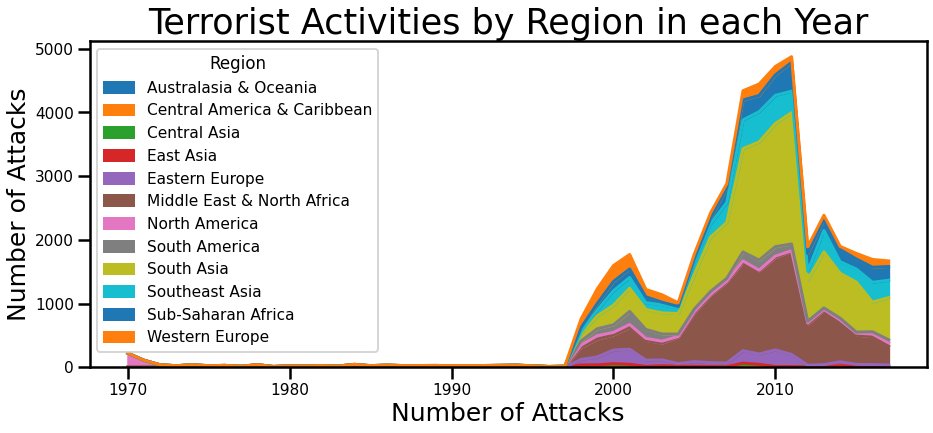

In [ ]:
pd.crosstab(Terror_Final.Year, Terror_Final.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year', size = 35)
plt.xlabel('Number of Attacks' , size = 25)
plt.ylabel('Number of Attacks', size = 25)
plt.show()

Conclusions: (1) The Most Attacked countries , city , region, year, month, group, types.

Conclusions: (1) The Most Attacked countries , city , region, year, month, group, types.

(2) Top 10 countries affected by terror attack

(3) Number of Terrorist Activities each Year

(4) Top 10 Affected Years

(5) Counts of attacks on different types of targets

(6) Counts of weapons used in attacks

(7) Top 10 Terrorist Organisations

(8) Most affected Regions Across the Globe

(9) Most Active Terrorist Organization

(10) Number of Casuality Due to Terror attacks

(11) Country vs Casuality (12) Terrorist Activities by Region in each Year through Area Plot